<a href="https://colab.research.google.com/github/DrLennon666/courses/blob/master/Copy_of_Exercise_8_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import csv
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [0]:
uploaded=files.upload()

Saving sign_mnist_test.csv to sign_mnist_test.csv


In [0]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion

    
    df = pd.read_csv(filename)
    
    final_images = []
    images = np.array(df.iloc[:,1:])
    
    for row in images:
      final_images.append(row.reshape(28,28))
    
    final_images = np.array(final_images)
    labels = np.array(df.iloc[:,0].copy())

    return final_images, labels


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [0]:
ImageDataGenerator(rescale = 1/255.,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [0]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis=-1)
testing_images = np.expand_dims(testing_images, axis=-1)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, 
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [0]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D

classes = np.unique(training_labels).shape[0]+1

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28,1)),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512, activation='relu'),
                                   tf.keras.layers.Dense(classes, activation='softmax')])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               410112    
_________________________________________________________________
dense_5 (Dense)              (None, 25)               

In [0]:


# Compile Model. 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics=['acc'])

# Train the Model
history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32),
                             steps_per_epoch=len(training_images) / 32,
                              epochs=15,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)

model.evaluate(testing_images, testing_labels)
    
# The output from model.evaluate should be close to:
[6.92426086682151, 0.56609035]


Epoch 1/15
858/857 [==============================] - 27s 32ms/step - loss: 2.6222 - acc: 0.1968 - val_loss: 1.8486 - val_acc: 0.4142
Epoch 2/15
858/857 [==============================] - 27s 31ms/step - loss: 1.8411 - acc: 0.4121 - val_loss: 1.3814 - val_acc: 0.5230
Epoch 3/15
858/857 [==============================] - 27s 31ms/step - loss: 1.4373 - acc: 0.5357 - val_loss: 0.9527 - val_acc: 0.6449
Epoch 4/15
858/857 [==============================] - 27s 31ms/step - loss: 1.2015 - acc: 0.6100 - val_loss: 0.5787 - val_acc: 0.7953
Epoch 5/15
858/857 [==============================] - 27s 31ms/step - loss: 1.0252 - acc: 0.6629 - val_loss: 0.6767 - val_acc: 0.7561
Epoch 6/15
858/857 [==============================] - 27s 31ms/step - loss: 0.9024 - acc: 0.7034 - val_loss: 0.4622 - val_acc: 0.8295
Epoch 7/15
858/857 [==============================] - 27s 31ms/step - loss: 0.8125 - acc: 0.7315 - val_loss: 0.5570 - val_acc: 0.8095
Epoch 8/15
858/857 [==============================] - 27s 31ms

[6.92426086682151, 0.56609035]

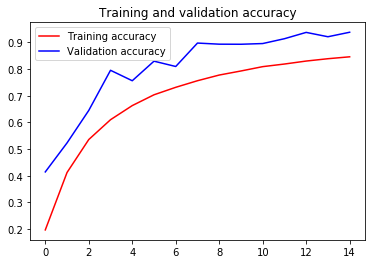

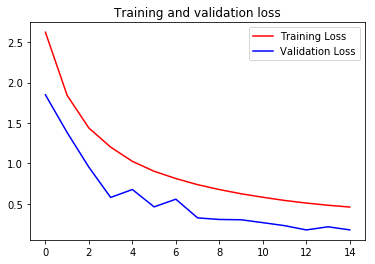

In [0]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc =  history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()